In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Q:
1,Önceki derste olduğu gibi, hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu bir doğrusal regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. R-kare ve ayarlanmış R-kare değerleri nelerdir? Tatminkar olduklarını düşünüyor musunuz? Açıklayın.

2,Daha sonra, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Şimdi, bu modelin R-kare değeri nedir? Bu model bir öncekine göre gelişti mi?

3,İlk modele ek açıklayıcı değişken olarak görünürlük ekleyin ve tahmin edin. R-kare arttı mı? Ayarlanmış R-kare değeri ne oldu? Tabloda ortaya çıkan farklılıkları, ayarlanmış R-kare içindeki iyileşme açısından etkileşim terimi ve görünürlük ile karşılaştırın. Hangisi daha kullanışlı?

4,AIC ve BIC puanlarına göre yukarıdaki üç modelden en iyisini seçin. Mentor ile gerekçenizi tartışarak seçiminizi doğrulayın.

In [2]:
hava= pd.read_csv('weatherHistory.csv')
hava.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.


In [3]:
hava['fark']=hava['Temperature (C)']-hava['Apparent Temperature (C)']
hava.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,fark
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,2.083


In [4]:
#Örnek-1
Y = hava['fark']
X = hava[['Humidity', 'Wind Speed (km/h)']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fark   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:08:35   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared ve Adj.R squared değerleri çok düşük modelimizi daha anlamlı bir hale getirmeliyiz.

In [7]:
#Örnek_2
Y = hava['fark']
hava['nem&rüzgarhızı']=hava['Humidity']*hava['Wind Speed (km/h)']
X = hava[['Humidity', 'Wind Speed (km/h)','nem&rüzgarhızı']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fark   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:25:18   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity             -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)    -0.0905      0.002    -36.797      0.000      -0.095      -0.086
nem&rüzgarhızı        0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
R squared bir önceki modele göre biraz arttı ancak halen anlamlı bir değerde değildir.

In [8]:
#Örnek_3
Y = hava['fark']
hava['nem&rüzgarhızı']=hava['Humidity']*hava['Wind Speed (km/h)']
X = hava[['Humidity', 'Wind Speed (km/h)','nem&rüzgarhızı', 'Visibility (km)']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fark   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.377e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:29:00   Log-Likelihood:            -1.6504e+05
No. Observations:               96453   AIC:                         3.301e+05
Df Residuals:                   96448   BIC:                         3.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1006      0.039     28.459      0.000       1.025       1.176
Humidity             -0.8909      0.044    -20.263      0.000      -0.977      -0.805
Wind Speed (km/h)    -0.1033      0.002    -42.579      0.000      -0.108      -0.099
nem&rüzgarhızı        0.3164      0.003     95.355      0.000       0.310       0.323
Visibility (km)      -0.0646      0.001    -58.051      0.000      -0.067      -0.062
==============================================================================
Omnibus:                     5328.364   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11525.074
Skew:                           0.373   Prob(JB):                         0.00
Kurtosis:                       4.520   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Örnek3 r squared ve adj r squared değerleri diğer iki örneğe göre daha anlamlı bir hale geldi.


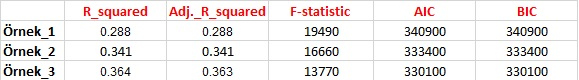

In [28]:
from IPython.display import Image
Image(filename = "adsız.jpg")

In [ ]:
Şemada Görüldüğü üzere AIC BIC değerlerine bakıldığı durumda örnek_3 modelimizin daha anlamlı olduğu görülmektedir.